In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('drugsComTrain_raw.tsv', sep='\t')
df

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10.0,"May 31, 2015",125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1.0,"November 1, 2011",34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2.0,"March 15, 2014",35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10.0,"September 19, 2015",79


In [3]:
test = pd.read_csv('drugsComTest_raw.tsv', sep='\t')
test.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


In [4]:
# as both the dataset contains same columns we can combine them for better analysis

data = pd.concat([df, test]).drop('Unnamed: 0',1)
data.head()

,drugName,condition,review,rating,date,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [5]:
# describing the data

data.describe()

,rating,usefulCount
count,215063.000000,215063.000000
mean,6.990008,28.001004
std,3.275554,36.346069
min,1.000000,0.000000
25%,5.000000,6.000000
50%,8.000000,16.000000
75%,10.000000,36.000000
max,10.000000,1291.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 53765
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   drugName     215063 non-null  object 
 1   condition    213869 non-null  object 
 2   review       215063 non-null  object 
 3   rating       215063 non-null  float64
 4   date         215063 non-null  object 
 5   usefulCount  215063 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 11.5+ MB


In [7]:
data.dtypes

drugName        object
condition       object
review          object
rating         float64
date            object
usefulCount      int64
dtype: object

In [8]:
data.isnull().sum()

drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

In [9]:
data.shape

(215063, 6)

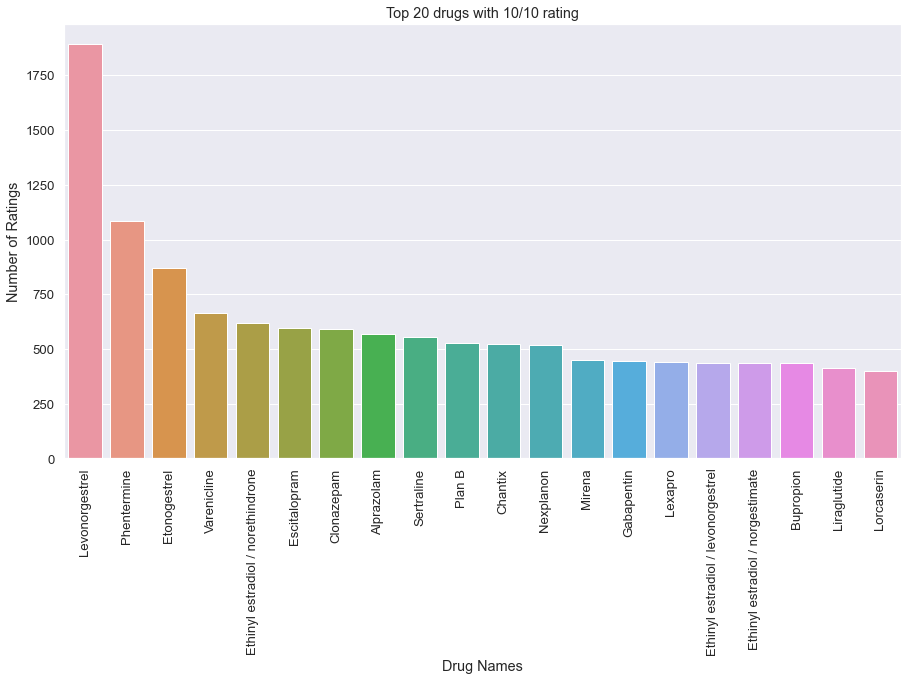

In [10]:
# This barplot shows the top 20 drugs with the 10/10 rating

sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

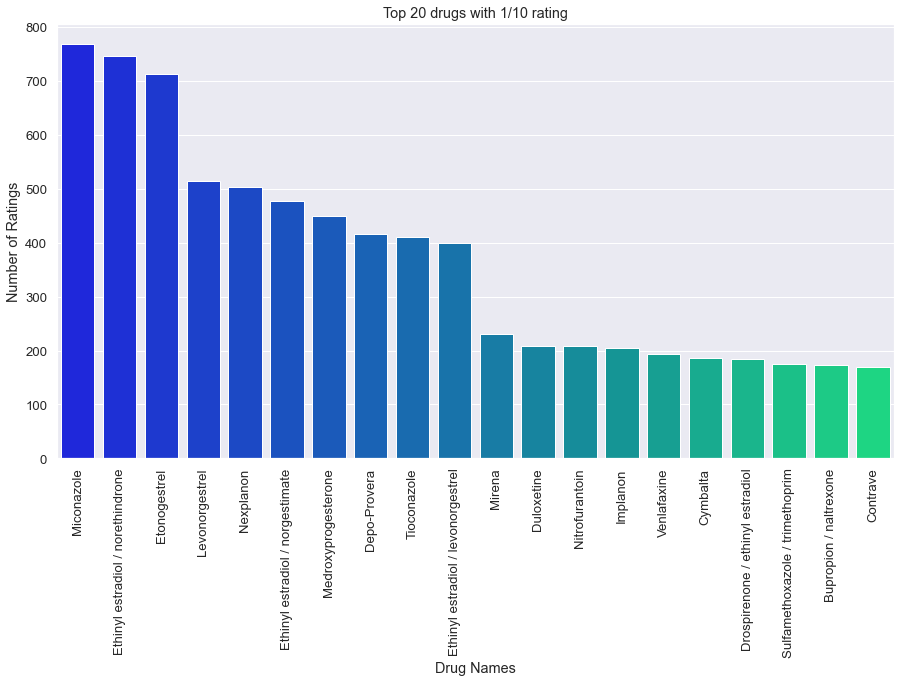

In [11]:
# This barplot shows the Top 20 drugs with the 1/10 rating
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

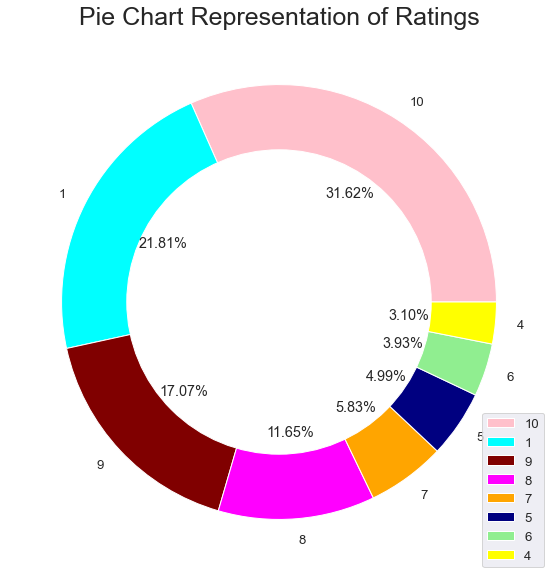

In [12]:
# making a donut chart to represent share of each ratings

size = [68005, 46901, 36708, 25046, 12547, 10723, 8462, 6671]
colors = ['pink', 'cyan', 'maroon',  'magenta', 'orange', 'navy', 'lightgreen', 'yellow']
labels = "10", "1", "9", "8", "7", "5", "6", "4"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Ratings', fontsize = 25)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

Text(0.5, 0, 'Rating')

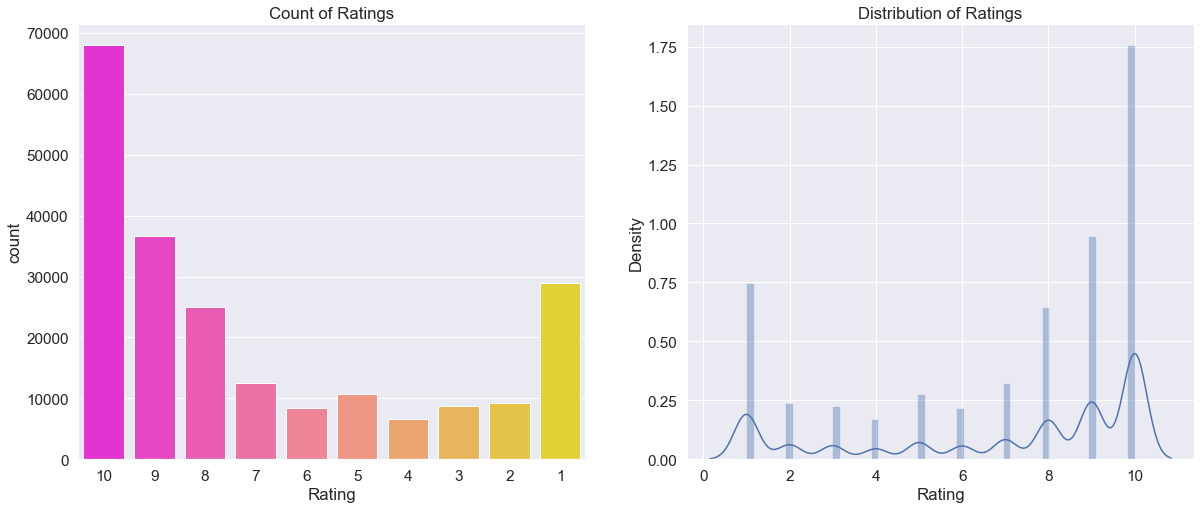

In [13]:
# A countplot of the ratings so we can see the distribution of the ratings
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'darkgrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(data['rating'], palette = 'spring', order = list(range(10, 0, -1)), ax = ax[0])
sns_2 = sns.distplot(data['rating'], ax = ax[1])
sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")

sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating")

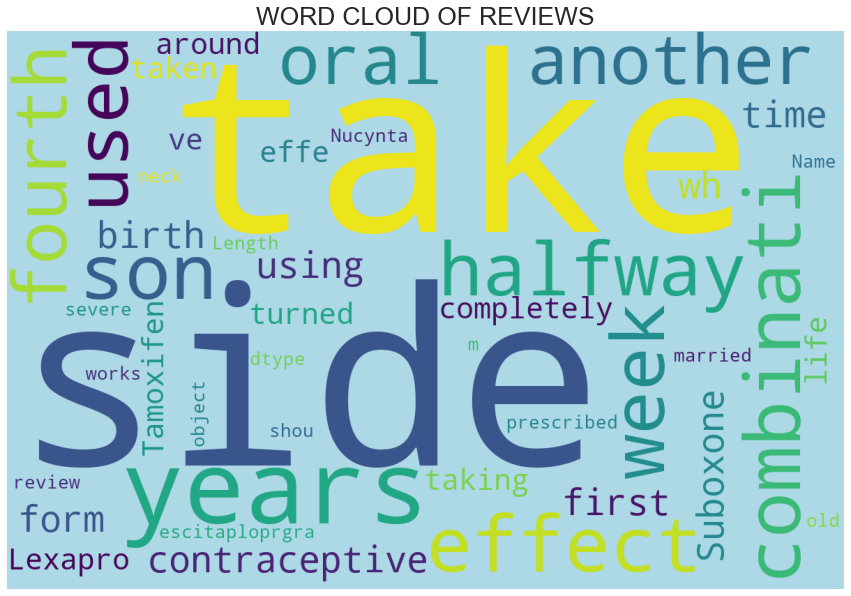

In [14]:
# let's see the words cloud for the reviews 

# most popular drugs

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'lightblue', stopwords = stopwords, width = 1200, height = 800).generate(str(data['review']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('WORD CLOUD OF REVIEWS', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [15]:
(data['rating']  >= 5 & (data['rating'] >= 7)).sum()

215063

In [16]:
# feature engineering 
# let's make a new column review sentiment 

data.loc[(data['rating'] >= 8), 'Review_Sentiment'] = 1
data.loc[(data['rating'] <= 4), 'Review_Sentiment'] = 2
data.loc[((data['rating']  >= 5) & (data['rating'] <= 7)), 'Review_Sentiment'] = 0

data['Review_Sentiment'].value_counts()

1.0    129759
2.0     53572
0.0     31732
Name: Review_Sentiment, dtype: int64

In [17]:
data.review[data.Review_Sentiment==0]

2        "I used to take another oral contraceptive, wh...
25       "Was prescribed one dose over the course of on...
28       "Honestly, I have been taking ativan for 2 yea...
43       "I have been taking this medicine due to lower...
49       "I battled a nasty UTI for over a month &amp; ...
                               ...                        
53732    "I&#039;m a 19 year old girl and I&#039;ve bee...
53733    "So in high school over ten years ago I starte...
53734    "I have been taking Jalyn for about 4 months, ...
53737    "Major sleepiness. Used it in the morning and ...
53759    "I was on Microgestin for about 3 years. Over ...
Name: review, Length: 31732, dtype: object

In [18]:
data.review[data.Review_Sentiment==0][2]

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

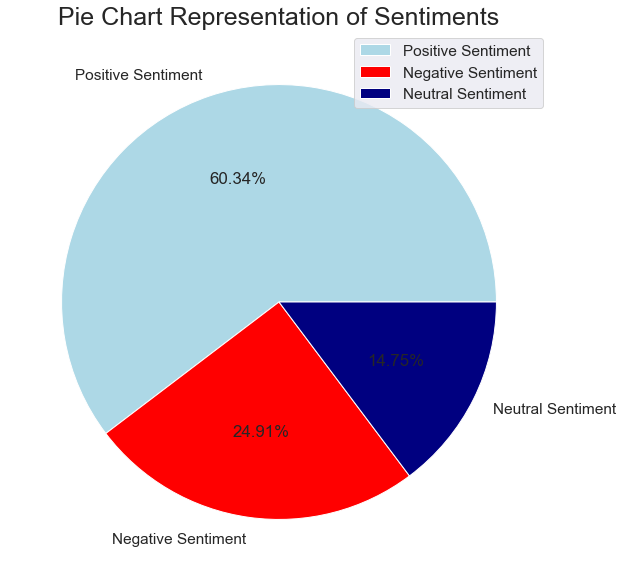

In [19]:
# a pie chart to represent the sentiments of the patients

size = [129759, 53572, 31732]
colors = ['lightblue', 'red', 'navy']
labels = "Positive Sentiment","Negative Sentiment", "Neutral Sentiment"

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Sentiments', fontsize = 25)
plt.legend()
plt.show()

<ul>
    <li style="font-size:150%;">This Pie Chart represents the Sentiments of the Reviews.</li>
<ul>

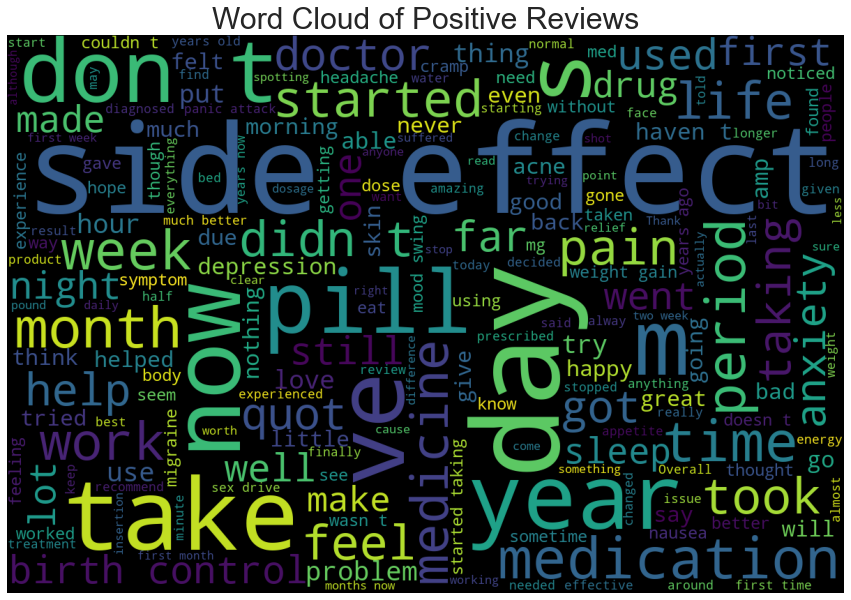

In [20]:
# making Words cloud for the postive sentiments

positive_sentiments = " ".join([text for text in data['review'][data['Review_Sentiment'] == 1]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'black', stopwords = stopwords, width = 1200, height = 800).generate(positive_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Positive Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

<ul>
    <li style="font-size:150%;">This is a word cloud for the Neutral Sentiments.</li>
<ul>

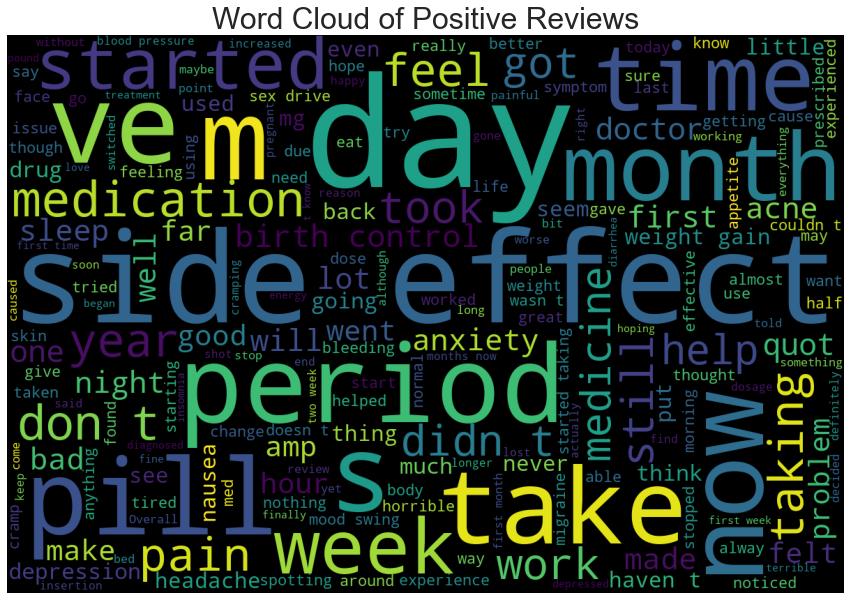

In [21]:
# making Words cloud for the postive sentiments

positive_sentiments = " ".join([text for text in data['review'][data['Review_Sentiment'] == 0]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'black', stopwords = stopwords, width = 1200, height = 800).generate(positive_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Positive Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

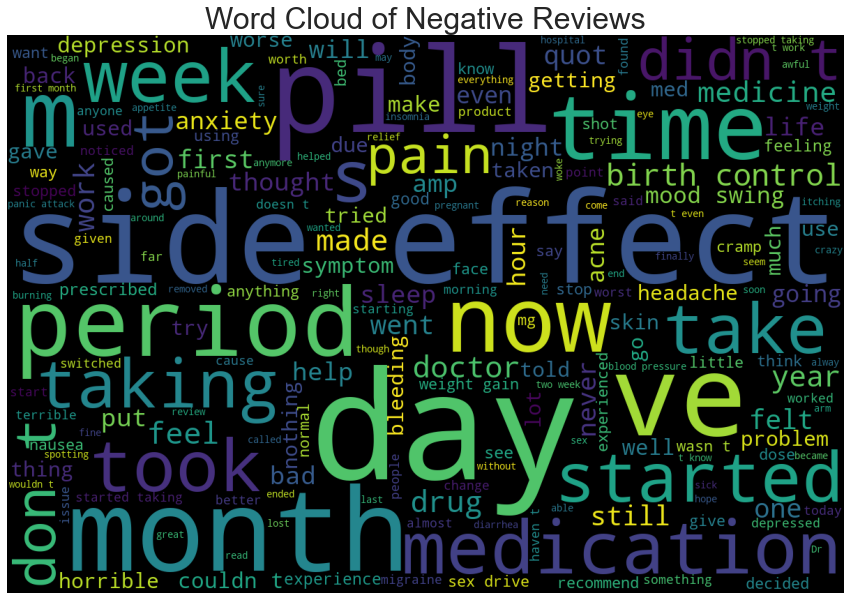

In [22]:
# making wordscloud for the Negative sentiments

negative_sentiments = " ".join([text for text in data['review'][data['Review_Sentiment'] == 2]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'black', stopwords = stopwords, width = 1200, height = 800).generate(negative_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Negative Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

<ul>
    <li style="font-size:150%;">This is a word cloud for the Negative Sentiments.</li>
<ul>

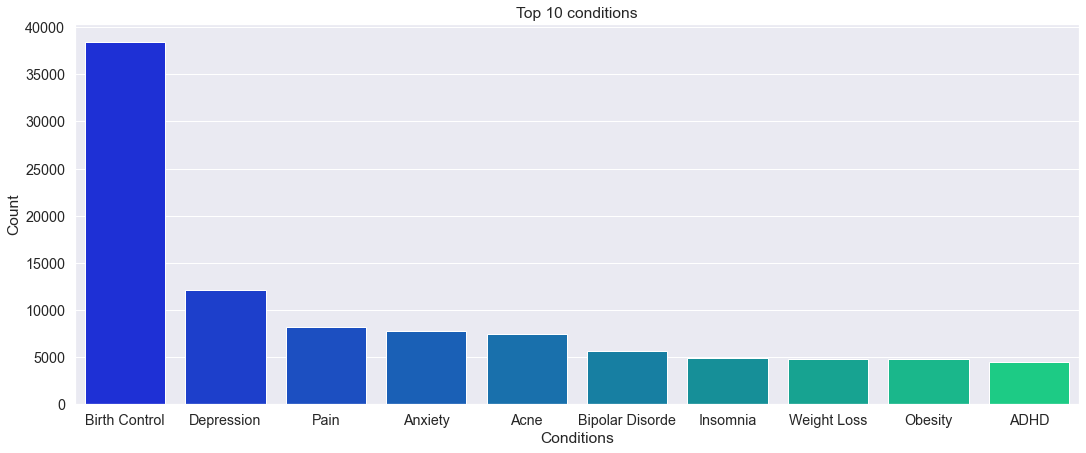

In [23]:
# This barplot show the top 10 conditions the people are suffering.
cond = dict(data['condition'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_title("Top 10 conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count");

# 1. BIRTH CONTROL

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

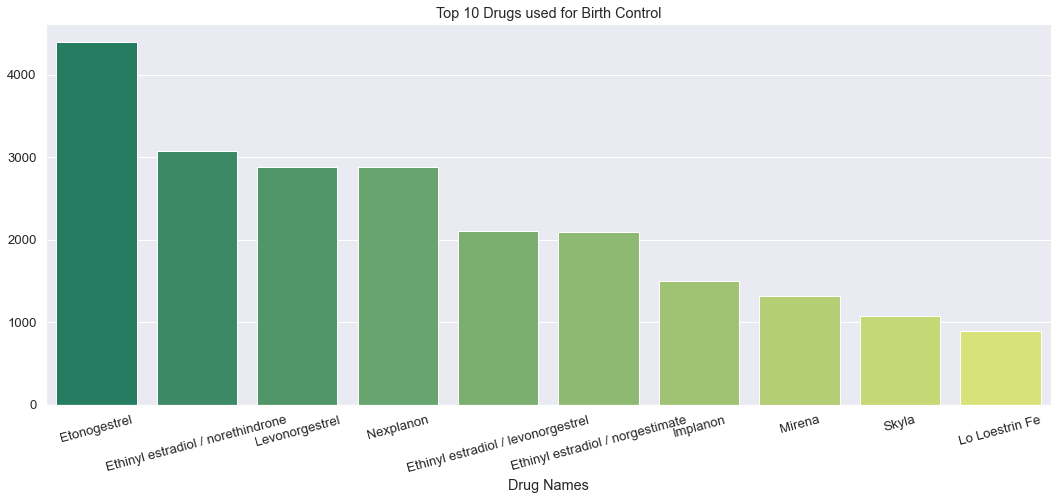

In [24]:
# Top 10 drugs which are used for the top condition, that is Birth Control
df1 = data[data['condition'] == 'Birth Control']['drugName'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df1.index, y = df1.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Birth Control")
plt.setp(sns_.get_xticklabels(), rotation = 15)

Text(0, 0.5, 'Percentage Sentiment in each category (%)')

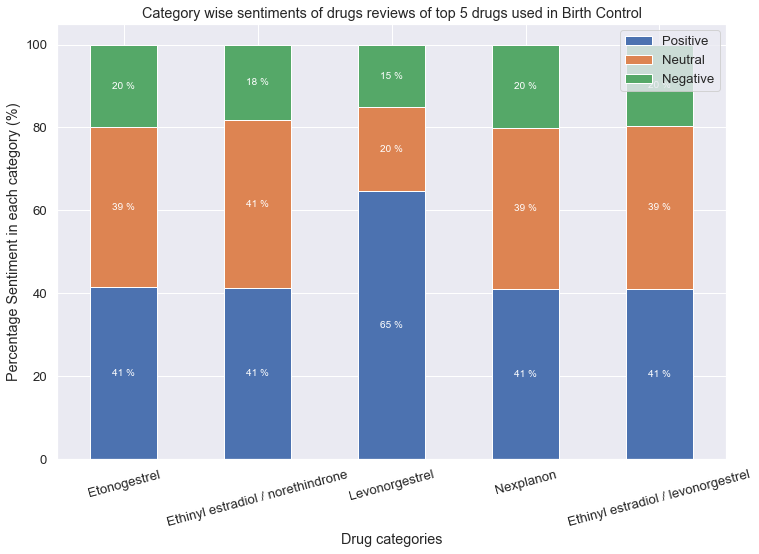

In [25]:
plotdata = pd.DataFrame({
    "Positive":[1834, 1547, 3181, 1184, 1025],
    "Neutral": [1706, 1523, 1007, 1125, 987],
    "Negative":[881,  683, 742, 583, 491]
    }, index=  ["Etonogestrel", "Ethinyl estradiol / norethindrone", "Levonorgestrel", "Nexplanon", "Ethinyl estradiol / levonorgestrel"]
)
plotdata
stacked_data = plotdata.apply(lambda x: x*100/sum(x), axis=1)
g = stacked_data.plot(kind="bar", stacked=True, figsize=(12,8))

for i in g.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    g.text(x+width/2, y+height/2, '{:.0f} %'.format(height), horizontalalignment='center', 
           verticalalignment='center',fontdict={'color': 'white','size': 10,
        })


plt.xticks(rotation=15)
plt.title("Category wise sentiments of drugs reviews of top 5 drugs used in Birth Control")
plt.xlabel("Drug categories")
plt.ylabel("Percentage Sentiment in each category (%)")

# 2. Depression

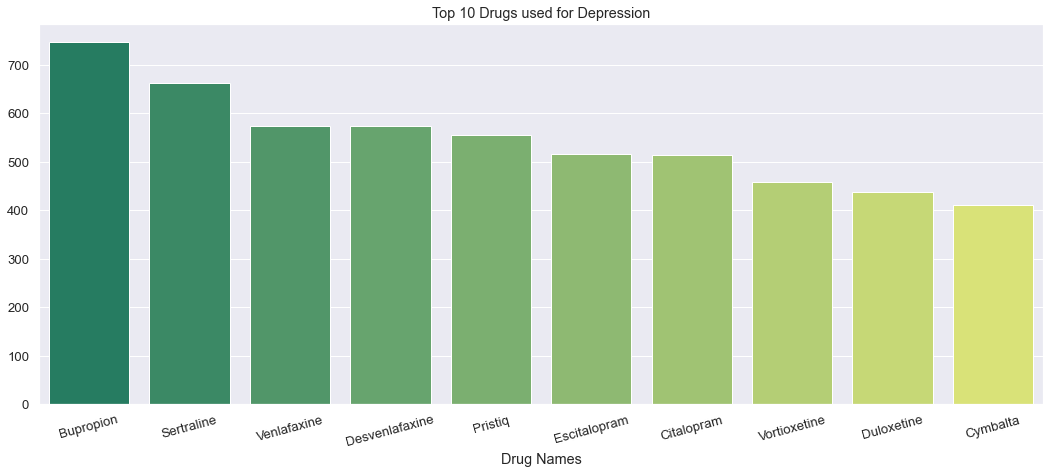

In [26]:
#Top 10 drugs which are used for the 2nd top condition, that is Depression
df1 = data[data['condition'] == 'Depression']['drugName'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df1.index, y = df1.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Depression")
plt.setp(sns_.get_xticklabels(), rotation = 15);

Text(0, 0.5, 'Percentage Sentiment in each category (%)')

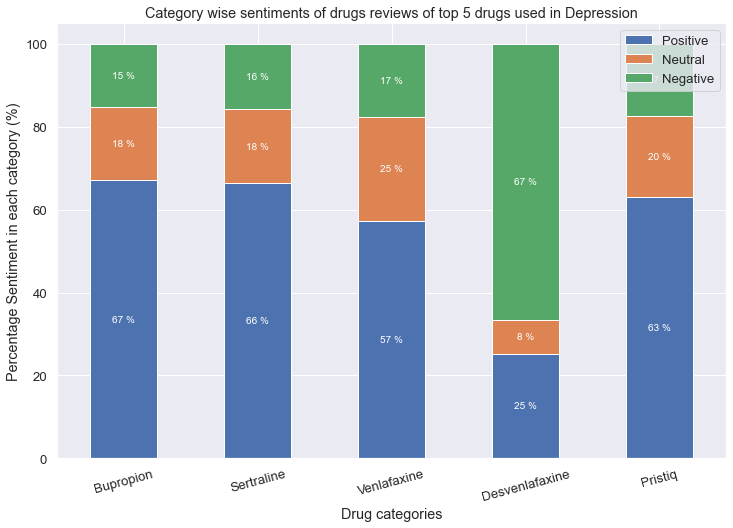

In [27]:
plotdata = pd.DataFrame({
    "Positive":[919, 1242, 768, 502,  460],
    "Neutral": [241, 331, 336, 161, 144],
    "Negative":[209,  295, 234, 1323,126]
    }, index=  ["Bupropion", "Sertraline", "Venlafaxine", "Desvenlafaxine", "Pristiq"]
)
plotdata
stacked_data = plotdata.apply(lambda x: x*100/sum(x), axis=1)
g = stacked_data.plot(kind="bar", stacked=True, figsize=(12,8))
for i in g.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    g.text(x+width/2, y+height/2, '{:.0f} %'.format(height), horizontalalignment='center', 
           verticalalignment='center',fontdict={'color': 'white','size': 10,
        })

plt.xticks(rotation=15)
plt.title("Category wise sentiments of drugs reviews of top 5 drugs used in Depression")
plt.xlabel("Drug categories")
plt.ylabel("Percentage Sentiment in each category (%)")

# 3. Pain

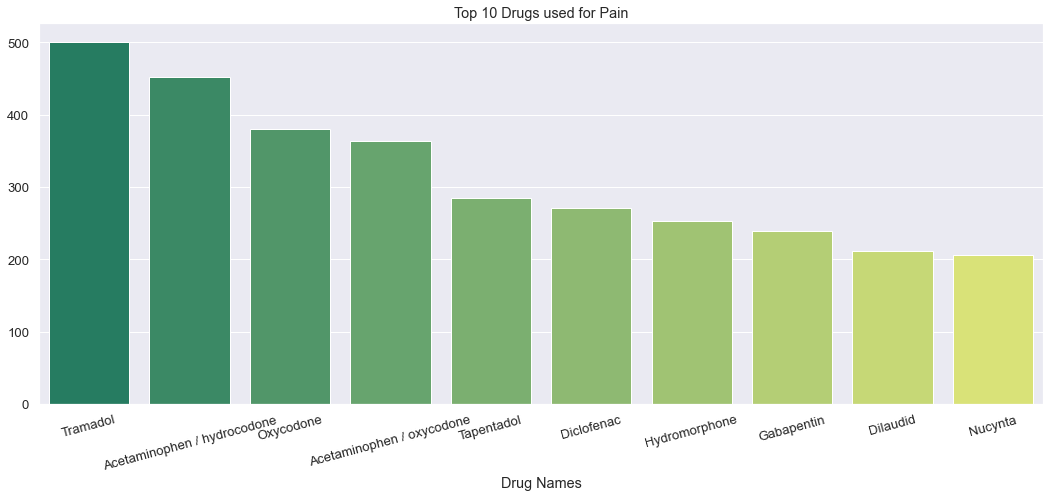

In [28]:
#Top 10 drugs which are used for the top condition, that is Birth Control
df1 = data[data['condition'] == 'Pain']['drugName'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df1.index, y = df1.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Pain")
plt.setp(sns_.get_xticklabels(), rotation = 15);

Text(0, 0.5, 'Percentage Sentiment in each category (%)')

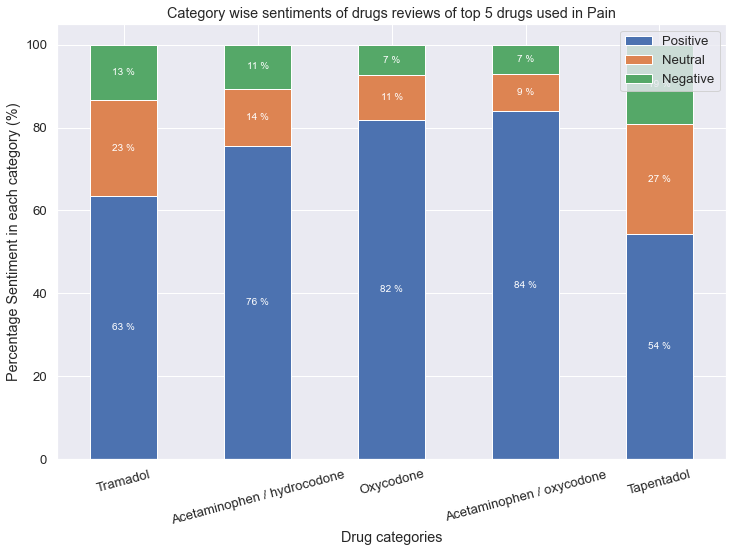

In [29]:
plotdata = pd.DataFrame({
    "Positive":[722, 519, 527, 433,159],
    "Neutral": [264, 94, 70, 47, 78],
    "Negative":[152,  73, 47, 36,56]
    }, index=  ["Tramadol", "Acetaminophen / hydrocodone", "Oxycodone", "Acetaminophen / oxycodone", "Tapentadol"]
)
plotdata
stacked_data = plotdata.apply(lambda x: x*100/sum(x), axis=1)
g = stacked_data.plot(kind="bar", stacked=True, figsize=(12,8))
for i in g.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    g.text(x+width/2, y+height/2, '{:.0f} %'.format(height), horizontalalignment='center', 
           verticalalignment='center',fontdict={'color': 'white','size': 10,
        })

plt.xticks(rotation=15)
plt.title("Category wise sentiments of drugs reviews of top 5 drugs used in Pain")
plt.xlabel("Drug categories")
plt.ylabel("Percentage Sentiment in each category (%)")

In [30]:
# converting the date into datetime format
data['date'] = pd.to_datetime(data['date'], errors = 'coerce')

# now extracting year from date
data['Year'] = data['date'].dt.year

# extracting the month from the date
data['month'] = data['date'].dt.month

# extracting the days from the date
data['day'] = data['date'].dt.day

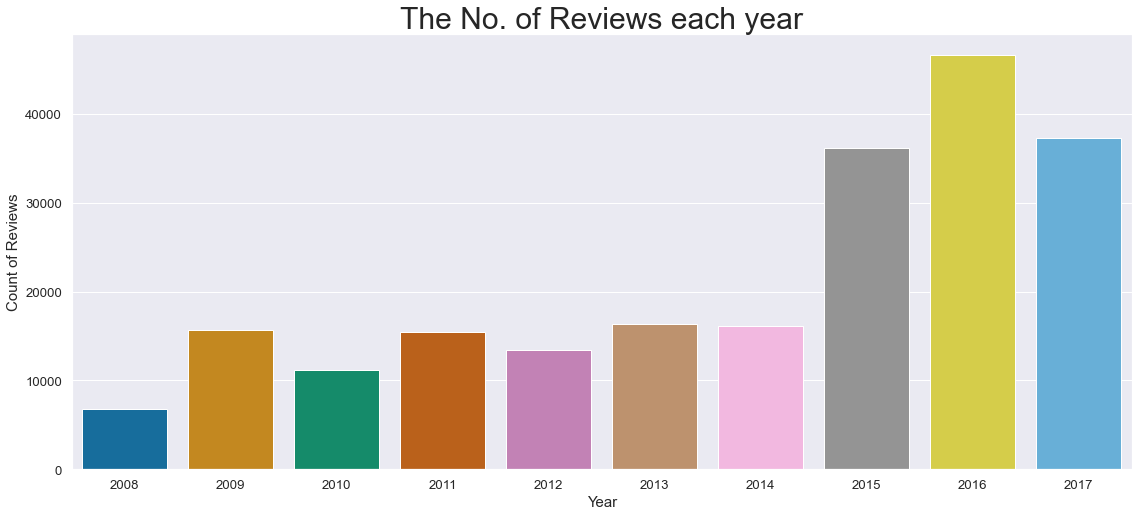

In [31]:
plt.rcParams['figure.figsize'] = (19, 8)
sns.countplot(data['Year'], palette ='colorblind')
plt.title('The No. of Reviews each year', fontsize = 30)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

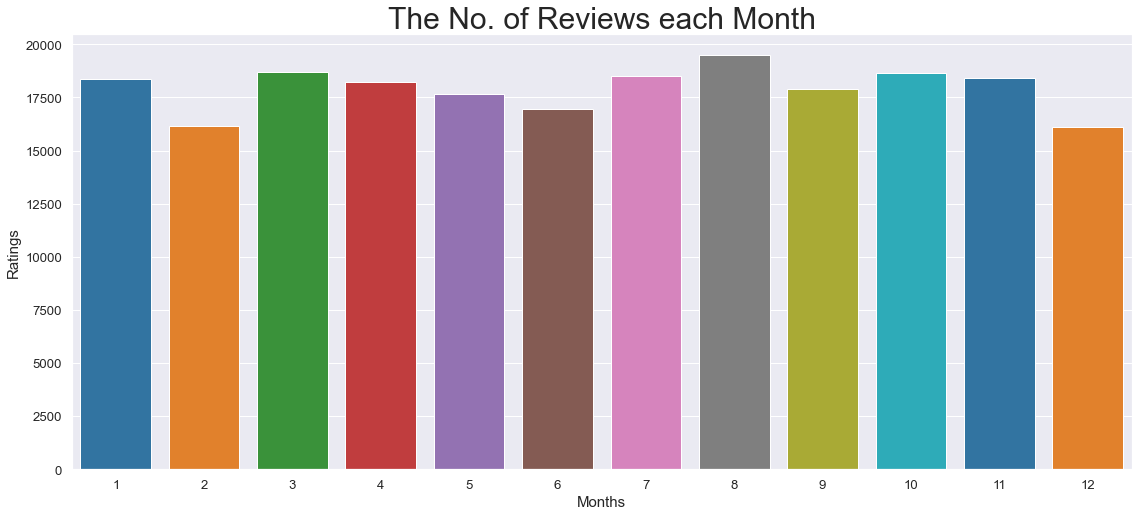

In [32]:
plt.rcParams['figure.figsize'] = (19, 8)
sns.countplot(data['month'], palette ='tab10')
plt.title('The No. of Reviews each Month', fontsize = 30)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Ratings', fontsize = 15)
plt.show()

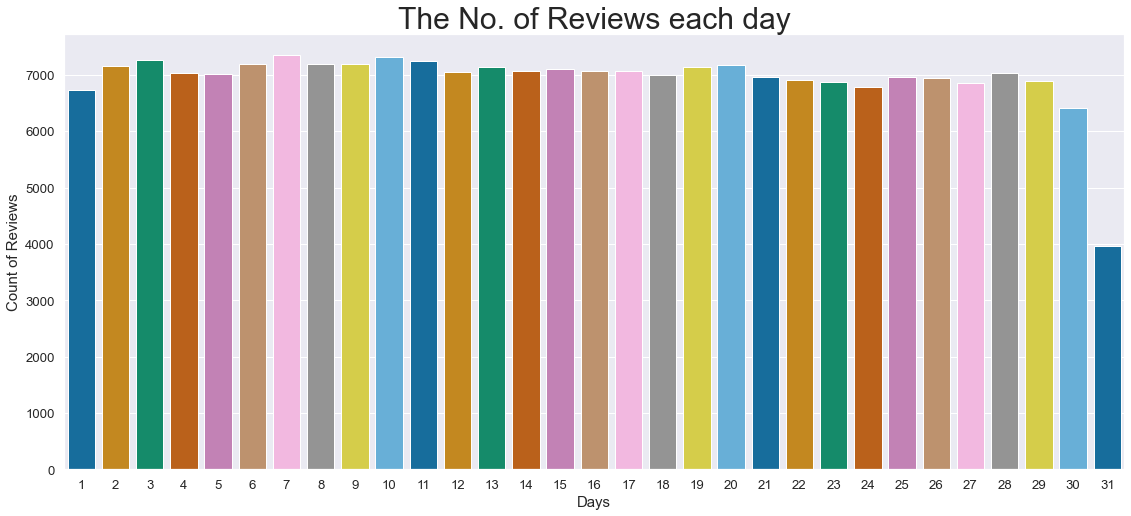

In [33]:
plt.rcParams['figure.figsize'] = (19, 8)
sns.countplot(data['day'], palette ='colorblind')
plt.title('The No. of Reviews each day', fontsize = 30)
plt.xlabel('Days', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

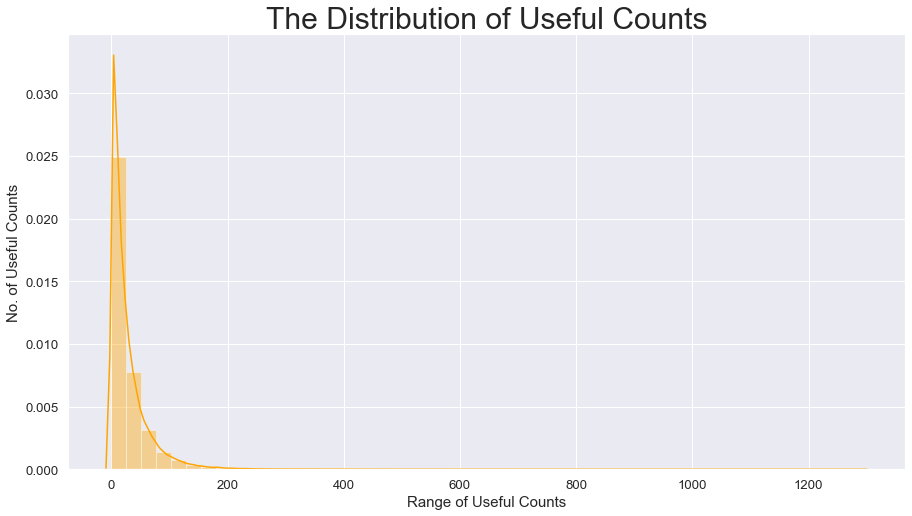

In [34]:
# plotting a dist plot
plt.rcParams['figure.figsize'] = (15, 8)
sns.distplot(data['usefulCount'], color = 'orange')
plt.title('The Distribution of Useful Counts', fontsize = 30)
plt.xlabel('Range of Useful Counts', fontsize = 15)
plt.ylabel('No. of Useful Counts', fontsize = 15)
plt.show()

# SENTIMENT MODELS

In [35]:
def review_clean(review): 
    # changing to lower case
    lower = review.str.lower()
    
    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")
    
    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')
    
    return dataframe

In [36]:
data['review_clean'] = review_clean(data['review'])

In [38]:
data

,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,Year,month,day,review_clean
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,2012-05-20,27,1.0,2012,5,20,it has no side effect i take it in combination...
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,2010-04-27,192,1.0,2010,4,27,my son is halfway through his fourth week of i...
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,2009-12-14,17,0.0,2009,12,14,i used to take another oral contraceptive whic...
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,2015-11-03,10,1.0,2015,11,3,this is my first time using any form of birth ...
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,2016-11-27,37,1.0,2016,11,27,suboxone has completely turned my life around ...
...,...,...,...,...,...,...,...,...,...,...,...
53761,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10.0,2014-09-13,43,1.0,2014,9,13,i have taken tamoxifen for 5 years side effect...
53762,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9.0,2016-10-08,11,1.0,2016,10,8,ive been taking lexapro escitaploprgram since ...
53763,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8.0,2010-11-15,7,1.0,2010,11,15,im married 34 years old and i have no kids tak...
53764,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1.0,2011-11-28,20,2.0,2011,11,28,i was prescribed nucynta for severe neck shoul...
